In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
import glob

In [3]:
files_list_original = []

for name in glob.glob('*.json'):
    files_list_original.append(name)
    
print(files_list_original)    

['friend_request.json', 'student_loginlog_aggreagate.json', 'student_question.json', 'student_download.json', 'student_answer.json', 'student_evaluation.json', 'student_comment.json', 'student_file_upload.json', 'student_aggregate.json', 'friend_connection.json']


In [4]:
files_list_student = files_list_original[3:8]
files_list_student

['student_download.json',
 'student_answer.json',
 'student_evaluation.json',
 'student_comment.json',
 'student_file_upload.json']

In [5]:
for file_name in files_list_student:
    col_name = file_name.split('.')[0]
    #print(col_name)
    with open(file_name, 'r') as f:
        data = json.load(f)
        
    var_name = 'df_{}'.format(col_name)
    print(var_name)
    globals()[var_name] = pd.DataFrame(data[col_name])   
    

df_student_download
df_student_answer
df_student_evaluation
df_student_comment
df_student_file_upload


# df_student_answer

In [6]:
df_student_answer.replace('', np.nan, inplace=True)

print('shape - df_student_answer', df_student_answer.shape)
print('info - df_student_answer', df_student_answer.info())

df_student_answer.head()

('shape - df_student_answer', (30000, 15))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
Active                30000 non-null object
AnswerClient          25974 non-null object
AnswerCreationDate    30000 non-null object
AnswerId              30000 non-null object
AnswerQuestionId      30000 non-null object
Client                30000 non-null object
Email                 30000 non-null object
FirstAccessedPage     22198 non-null object
Fullname              30000 non-null object
Gender                30000 non-null object
Id                    30000 non-null object
IsMobileRegister      30000 non-null object
LastLoginDate         30000 non-null object
RegisteredDate        30000 non-null object
UploadCount           30000 non-null object
dtypes: object(15)
memory usage: 3.4+ MB
('info - df_student_answer', None)


,Active,AnswerClient,AnswerCreationDate,AnswerId,AnswerQuestionId,Client,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,NaN,2015-12-07 15:18:02,17763294,5074174,Website,murillomoraes08@gmail.com,https://www.passeidireto.com/,MurilloArcuri Moraes,false,17762776,false,2015-12-07 15:22:28,2015-12-07 14:51:32,0
1,true,NaN,2015-12-07 15:03:11,17762984,17762377,Website,barbara.balooalves@gmail.com,https://www.passeidireto.com/arquivo/4197285/l...,Bárbara,false,17762682,false,2015-12-07 14:47:04,2015-12-07 14:47:03,0
2,true,NaN,2015-12-07 14:47:01,17762678,17580522,Website,beatriz2015direito@outlook.com,https://www.passeidireto.com/arquivo/10987443/...,BEATRIZEDUARDA,false,17762395,false,2015-12-07 14:33:32,2015-12-07 14:33:32,0
3,true,NaN,2015-12-07 13:50:25,17761647,17720688,Website,lais.ane@hotmail.com,https://www.passeidireto.com/arquivo/17450205/...,Lais Garcia,false,17761512,false,2015-12-07 13:41:45,2015-12-07 13:41:42,0
4,true,NaN,2015-12-07 13:51:06,17761650,17720688,Website,lais.ane@hotmail.com,https://www.passeidireto.com/arquivo/17450205/...,Lais Garcia,false,17761512,false,2015-12-07 13:41:45,2015-12-07 13:41:42,0


              variavel   % de info
7    FirstAccessedPage   73.993333
1         AnswerClient   86.580000
0               Active  100.000000
2   AnswerCreationDate  100.000000
3             AnswerId  100.000000
4     AnswerQuestionId  100.000000
5               Client  100.000000
6                Email  100.000000
8             Fullname  100.000000
9               Gender  100.000000
10                  Id  100.000000
11    IsMobileRegister  100.000000
12       LastLoginDate  100.000000
13      RegisteredDate  100.000000
14         UploadCount  100.000000


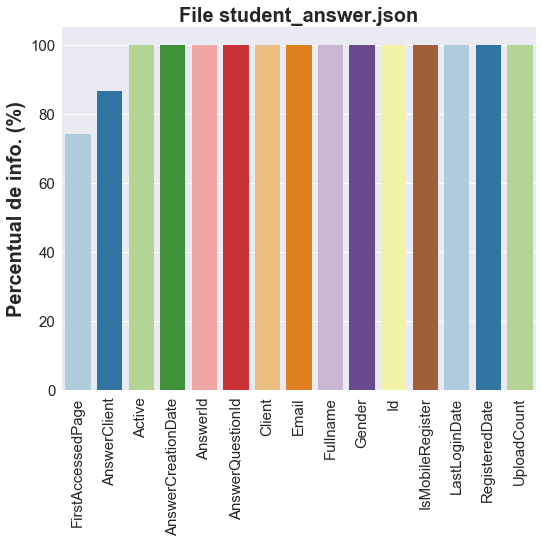

In [7]:
column_s_answer = []
total_s_answer = []

for column in df_student_answer.columns:
    perc = (float(df_student_answer[column].count())/
            len(df_student_answer))*100
    #print column, perc
    column_s_answer.append(column)
    total_s_answer.append(perc)

df_info_s_answer = pd.DataFrame(total_s_answer,
                              column_s_answer).reset_index()
df_info_s_answer.columns = ['variavel', '% de info']
df_info_s_answer = df_info_s_answer.sort_values(by='% de info', ascending=True)
print(df_info_s_answer)  #.iloc[:15,:]

graph_s_answer = sns.barplot(x='variavel', y='% de info',
                           data=df_info_s_answer, palette='Paired')
for tick in graph_s_answer.get_xticklabels():
    tick.set_rotation(90)

graph_s_answer.xaxis.set_tick_params(labelsize=15)    
graph_s_answer.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File student_answer.json', fontweight='bold', fontsize=20)
plt.tight_layout()
graph_s_answer.figure.savefig('graph_s_answer.png', dpi=100)


# df_student_comment

In [8]:
print('shape - df_student_comment', df_student_comment.shape)

df_student_comment.head()

('shape - df_student_comment', (30000, 15))


,Active,Client,CommentClient,CommentContentObjectId,CommentID,CommentPublishDate,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,Android | 5.0.2 | sdk 21,Android | 5.0.2 | sdk 21,2384923,17763931,2015-12-07 15:50:20,myka.fernandes@hotmail.com,,MykaelaFernandes Correia,false,17763660,true,2015-12-07 15:37:51,2015-12-07 15:37:51,0
1,true,Website,,17637647,17763184,2015-12-07 15:13:21,rebyslopes@gmail.com,https://www.passeidireto.com/arquivo/6452677/e...,RebecaLopes,false,17763060,false,2015-12-07 15:06:48,2015-12-07 15:06:47,0
2,true,Website,,664623,17763605,2015-12-07 15:35:01,murillomoraes08@gmail.com,https://www.passeidireto.com/,MurilloArcuri Moraes,false,17762776,false,2015-12-07 15:22:28,2015-12-07 14:51:32,0
3,true,Website,,17108910,17763019,2015-12-07 15:04:52,clairfroes@hotmail.com,https://www.passeidireto.com/arquivo/17108927/...,clair,false,17762671,false,2015-12-07 14:46:41,2015-12-07 14:46:44,0
4,true,Website,Website Premium Page,1480063,17763007,2015-12-07 15:04:22,corretorciceroesmael@yahoo.com.br,https://www.passeidireto.com/,CíceroEsmael da Silva Oliveira,false,17761507,false,2015-12-07 13:50:35,2015-12-07 13:41:30,0


In [9]:
df_student_comment.replace('', np.nan, inplace=True)

print('shape - df_student_comment', df_student_comment.shape)
print('info - df_student_comment', df_student_comment.info())

df_student_comment.head()

('shape - df_student_comment', (30000, 15))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
Active                    30000 non-null object
Client                    30000 non-null object
CommentClient             24855 non-null object
CommentContentObjectId    30000 non-null object
CommentID                 30000 non-null object
CommentPublishDate        30000 non-null object
Email                     30000 non-null object
FirstAccessedPage         19889 non-null object
Fullname                  30000 non-null object
Gender                    30000 non-null object
Id                        30000 non-null object
IsMobileRegister          30000 non-null object
LastLoginDate             30000 non-null object
RegisteredDate            30000 non-null object
UploadCount               30000 non-null object
dtypes: object(15)
memory usage: 3.4+ MB
('info - df_student_comment', None)


,Active,Client,CommentClient,CommentContentObjectId,CommentID,CommentPublishDate,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,Android | 5.0.2 | sdk 21,Android | 5.0.2 | sdk 21,2384923,17763931,2015-12-07 15:50:20,myka.fernandes@hotmail.com,NaN,MykaelaFernandes Correia,false,17763660,true,2015-12-07 15:37:51,2015-12-07 15:37:51,0
1,true,Website,NaN,17637647,17763184,2015-12-07 15:13:21,rebyslopes@gmail.com,https://www.passeidireto.com/arquivo/6452677/e...,RebecaLopes,false,17763060,false,2015-12-07 15:06:48,2015-12-07 15:06:47,0
2,true,Website,NaN,664623,17763605,2015-12-07 15:35:01,murillomoraes08@gmail.com,https://www.passeidireto.com/,MurilloArcuri Moraes,false,17762776,false,2015-12-07 15:22:28,2015-12-07 14:51:32,0
3,true,Website,NaN,17108910,17763019,2015-12-07 15:04:52,clairfroes@hotmail.com,https://www.passeidireto.com/arquivo/17108927/...,clair,false,17762671,false,2015-12-07 14:46:41,2015-12-07 14:46:44,0
4,true,Website,Website Premium Page,1480063,17763007,2015-12-07 15:04:22,corretorciceroesmael@yahoo.com.br,https://www.passeidireto.com/,CíceroEsmael da Silva Oliveira,false,17761507,false,2015-12-07 13:50:35,2015-12-07 13:41:30,0


                  variavel   % de info
7        FirstAccessedPage   66.296667
2            CommentClient   82.850000
0                   Active  100.000000
1                   Client  100.000000
3   CommentContentObjectId  100.000000
4                CommentID  100.000000
5       CommentPublishDate  100.000000
6                    Email  100.000000
8                 Fullname  100.000000
9                   Gender  100.000000
10                      Id  100.000000
11        IsMobileRegister  100.000000
12           LastLoginDate  100.000000
13          RegisteredDate  100.000000
14             UploadCount  100.000000


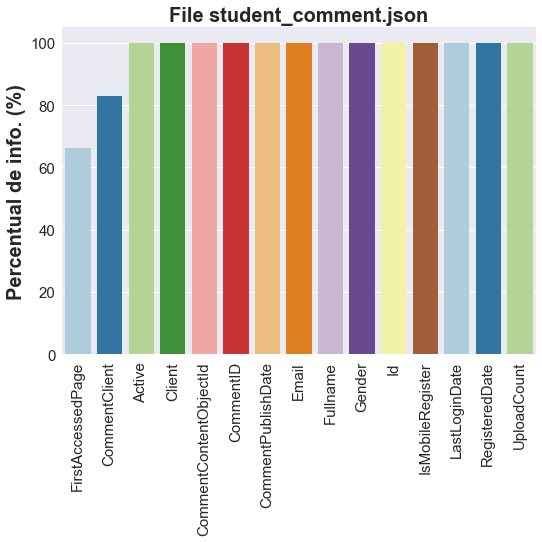

In [10]:
column_s_comment = []
total_s_comment = []

for column in df_student_comment.columns:
    perc = (float(df_student_comment[column].count())/
            len(df_student_comment))*100
    #print column, perc
    column_s_comment.append(column)
    total_s_comment.append(perc)

df_info_s_comment = pd.DataFrame(total_s_comment,
                              column_s_comment).reset_index()
df_info_s_comment.columns = ['variavel', '% de info']
df_info_s_comment = df_info_s_comment.sort_values(by='% de info', ascending=True)
print(df_info_s_comment)  #.iloc[:15,:]

graph_s_comment = sns.barplot(x='variavel', y='% de info',
                           data=df_info_s_comment, palette='Paired')
for tick in graph_s_comment.get_xticklabels():
    tick.set_rotation(90)

graph_s_comment.xaxis.set_tick_params(labelsize=15)    
graph_s_comment.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File student_comment.json', fontweight='bold', fontsize=20)
plt.tight_layout()
#graph_s_comment.figure.savefig('info_df_s_comment.png', dpi=1000)

# df_student_download

In [11]:
df_student_download.replace('', np.nan, inplace=True)

print('shape - df_student_download', df_student_download.shape)

print(df_student_download.info())

df_student_download.head()

('shape - df_student_download', (50000, 15))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
Active               50000 non-null object
Client               50000 non-null object
DownloadClient       23608 non-null object
DownloadDate         50000 non-null object
DownloadFileID       50000 non-null object
DownloadID           50000 non-null object
Email                50000 non-null object
FirstAccessedPage    32768 non-null object
Fullname             50000 non-null object
Gender               50000 non-null object
Id                   50000 non-null object
IsMobileRegister     50000 non-null object
LastLoginDate        50000 non-null object
RegisteredDate       50000 non-null object
UploadCount          50000 non-null object
dtypes: object(15)
memory usage: 5.7+ MB
None


,Active,Client,DownloadClient,DownloadDate,DownloadFileID,DownloadID,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,Website,NaN,2015-12-07 19:12:13,1561467,47839069,carolinabrovani@gmail.com,https://www.passeidireto.com/arquivo/1561467/m...,carolinab,false,17769990,false,2015-12-07 19:10:41,2015-12-07 19:10:43,0
1,true,Website,NaN,2015-12-07 19:09:54,1776861,47838631,wesley10_henrique@hotmail.com,https://www.passeidireto.com/arquivo/1776861/t...,Wesley Ruiz,true,17769961,false,2015-12-07 19:08:39,2015-12-07 19:08:36,0
2,true,Website,NaN,2015-12-07 19:10:12,3616897,47838702,baluhh@hotmail.com,https://www.passeidireto.com/arquivo/3616897/l...,LucasBrandt,false,17769942,false,2015-12-07 19:07:41,2015-12-07 19:07:44,0
3,true,Website,NaN,2015-12-07 19:08:55,4180002,47838451,otavioluiz.2203@gmail.com,https://www.passeidireto.com/arquivo/4180002/c...,Luiz Shinkami,true,17769936,false,2015-12-07 19:07:24,2015-12-07 19:07:23,0
4,true,Website,NaN,2015-12-07 19:09:08,3046473,47838484,junior_jr17msn@hotmail.com,https://www.passeidireto.com/arquivo/3046473/q...,Jorgeluiz,false,17769935,false,2015-12-07 19:07:22,2015-12-07 19:07:21,0


             variavel  % de info
2      DownloadClient     47.216
7   FirstAccessedPage     65.536
0              Active    100.000
1              Client    100.000
3        DownloadDate    100.000
4      DownloadFileID    100.000
5          DownloadID    100.000
6               Email    100.000
8            Fullname    100.000
9              Gender    100.000
10                 Id    100.000
11   IsMobileRegister    100.000
12      LastLoginDate    100.000
13     RegisteredDate    100.000
14        UploadCount    100.000


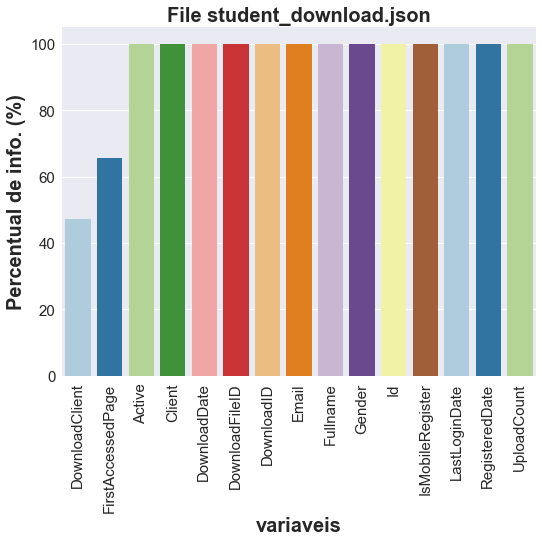

In [12]:
column_s_download = []
total_s_download = []

for column in df_student_download.columns:
    perc = (float(df_student_download[column].count())/
            len(df_student_download))*100
    #print column, perc
    column_s_download.append(column)
    total_s_download.append(perc)

df_info_s_download = pd.DataFrame(total_s_download,
                              column_s_download).reset_index()
df_info_s_download.columns = ['variavel', '% de info']
df_info_s_download = df_info_s_download.sort_values(by='% de info', ascending=True)
print(df_info_s_download)  #.iloc[:15,:]

graph_s_download = sns.barplot(x='variavel', y='% de info',
                           data=df_info_s_download, palette='Paired')
for tick in graph_s_download.get_xticklabels():
    tick.set_rotation(90)

graph_s_download.xaxis.set_tick_params(labelsize=15)    
graph_s_download.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('variaveis', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File student_download.json', fontweight='bold', fontsize=20)
plt.tight_layout()
graph_s_download.figure.savefig('info_df_s_download.png', dpi=1000)

# df_student_evaluation

In [13]:
df_student_evaluation.replace('', np.nan, inplace=True)

print('shape - df_student_evaluation', df_student_evaluation.shape)

print(df_student_evaluation.info())
df_student_evaluation.head()

('shape - df_student_evaluation', (30000, 16))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
Active                       30000 non-null object
Client                       30000 non-null object
Email                        30000 non-null object
EvaluationClient             17754 non-null object
EvaluationContentObjectID    30000 non-null object
EvaluationDate               30000 non-null object
EvaluationID                 30000 non-null object
EvaluationValue              30000 non-null object
FirstAccessedPage            22910 non-null object
Fullname                     30000 non-null object
Gender                       30000 non-null object
Id                           30000 non-null object
IsMobileRegister             30000 non-null object
LastLoginDate                30000 non-null object
RegisteredDate               30000 non-null object
UploadCount                  30000 non-null object
dtypes: object(16)
memory us

,Active,Client,Email,EvaluationClient,EvaluationContentObjectID,EvaluationDate,EvaluationID,EvaluationValue,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,Mobile,wesleycostagomes13@gmail.com,Mobile,17655774,2015-12-07 19:08:33,3578668,true,NaN,Wesley Costa,true,17769571,true,2015-12-07 18:46:49,2015-12-07 18:46:51,0
1,true,iOS | 9.1,netthynho_007@hotmail.com,iOS | 9.1,1706563,2015-12-07 18:31:50,3578357,false,NaN,Netinho Oliveira,true,17769159,true,2015-12-07 18:27:51,2015-12-07 18:27:51,0
2,true,Website,havilo_weider@hotmail.com,NaN,17596604,2015-12-07 19:04:38,3578626,true,https://www.passeidireto.com/arquivo/2372371/a...,haviloweideraraujo lopes,false,17769065,false,2015-12-07 18:23:49,2015-12-07 18:23:49,0
3,true,Website,havilo_weider@hotmail.com,NaN,17666733,2015-12-07 19:03:51,3578617,true,https://www.passeidireto.com/arquivo/2372371/a...,haviloweideraraujo lopes,false,17769065,false,2015-12-07 18:23:49,2015-12-07 18:23:49,0
4,true,Android | 6.0 | sdk 23,fabiomezzalira@gmail.com,Android | 6.0 | sdk 23,17745887,2015-12-07 18:25:31,3578305,true,NaN,fabio,false,17768927,true,2015-12-07 18:20:26,2015-12-07 18:20:12,0


                     variavel   % de info
3            EvaluationClient   59.180000
8           FirstAccessedPage   76.366667
0                      Active  100.000000
1                      Client  100.000000
2                       Email  100.000000
4   EvaluationContentObjectID  100.000000
5              EvaluationDate  100.000000
6                EvaluationID  100.000000
7             EvaluationValue  100.000000
9                    Fullname  100.000000
10                     Gender  100.000000
11                         Id  100.000000
12           IsMobileRegister  100.000000
13              LastLoginDate  100.000000
14             RegisteredDate  100.000000
15                UploadCount  100.000000


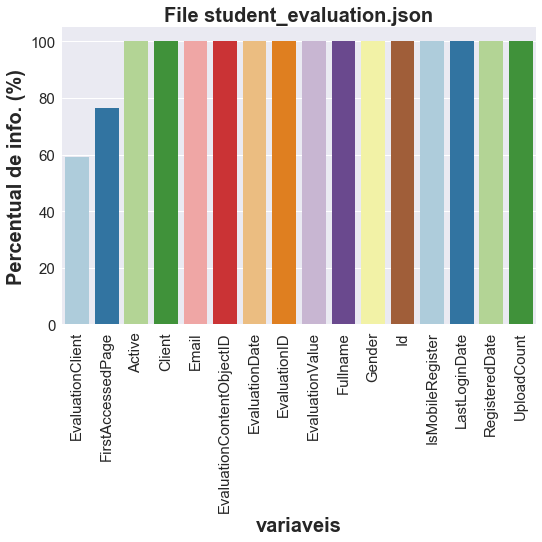

In [14]:
column_s_evaluation = []
total_s_evaluation = []

for column in df_student_evaluation.columns:
    perc = (float(df_student_evaluation[column].count())/
            len(df_student_evaluation))*100
    #print column, perc
    column_s_evaluation.append(column)
    total_s_evaluation.append(perc)

df_info_s_evaluation = pd.DataFrame(total_s_evaluation,
                              column_s_evaluation).reset_index()
df_info_s_evaluation.columns = ['variavel', '% de info']
df_info_s_evaluation = df_info_s_evaluation.sort_values(by='% de info', ascending=True)
print(df_info_s_evaluation)  #.iloc[:15,:]

graph_s_evaluation = sns.barplot(x='variavel', y='% de info',
                           data=df_info_s_evaluation, palette='Paired')
for tick in graph_s_evaluation.get_xticklabels():
    tick.set_rotation(90)

graph_s_evaluation.xaxis.set_tick_params(labelsize=15)    
graph_s_evaluation.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('variaveis', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File student_evaluation.json', fontweight='bold', fontsize=20)
plt.tight_layout()
#graph_s_evaluation.figure.savefig('info_df_s_evaluation.png', dpi=1000)

# df_student_file_upload

In [15]:
print('shape - df_student_file_upload', df_student_file_upload.shape)

df_student_file_upload.replace('', np.nan, inplace=True)

print(df_student_file_upload.info())
df_student_file_upload.head()

('shape - df_student_file_upload', (50000, 18))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
Active                  50000 non-null object
Client                  50000 non-null object
Email                   50000 non-null object
FileContentObjectId     50000 non-null object
FileDownloadTotal       50000 non-null object
FileEvaluationTotal     50000 non-null object
FileFileUrl             50000 non-null object
FileID                  50000 non-null object
FilePreviewPageCount    50000 non-null object
FileUploadDate          50000 non-null object
FirstAccessedPage       44462 non-null object
Fullname                50000 non-null object
Gender                  50000 non-null object
Id                      50000 non-null object
IsMobileRegister        50000 non-null object
LastLoginDate           50000 non-null object
RegisteredDate          50000 non-null object
UploadCount             50000 non-null object
dtypes: object(

,Active,Client,Email,FileContentObjectId,FileDownloadTotal,FileEvaluationTotal,FileFileUrl,FileID,FilePreviewPageCount,FileUploadDate,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,UploadCount
0,true,Website,marciopacheco.adm@hotmail.com,1504424,0,0,508499d3-1ff6-4ad8-8abf-108f098090d6,17769351,0,2015-12-07 18:36:41,https://www.passeidireto.com/,MárcioAlexandre,false,17762846,false,2015-12-07 14:55:16,2015-12-07 14:55:15,0
1,true,Website,marciopacheco.adm@hotmail.com,1504424,0,0,29b9a95f-adfd-416d-b696-b0a7332691ab,17769346,0,2015-12-07 18:36:30,https://www.passeidireto.com/,MárcioAlexandre,false,17762846,false,2015-12-07 14:55:16,2015-12-07 14:55:15,0
2,true,Website,marciopacheco.adm@hotmail.com,1504424,0,0,ab294c4f-cba9-4765-9b18-b3d86aa762a8,17769342,0,2015-12-07 18:36:18,https://www.passeidireto.com/,MárcioAlexandre,false,17762846,false,2015-12-07 14:55:16,2015-12-07 14:55:15,0
3,true,Website,marciopacheco.adm@hotmail.com,1504424,0,0,b3904a21-9cc7-4e5c-b23f-e529d0aec8db,17769336,0,2015-12-07 18:36:03,https://www.passeidireto.com/,MárcioAlexandre,false,17762846,false,2015-12-07 14:55:16,2015-12-07 14:55:15,0
4,true,Website,marciopacheco.adm@hotmail.com,1504424,0,0,80af3287-0400-4c40-82aa-c60364024f69,17769332,0,2015-12-07 18:35:45,https://www.passeidireto.com/,MárcioAlexandre,false,17762846,false,2015-12-07 14:55:16,2015-12-07 14:55:15,0


                variavel  % de info
10     FirstAccessedPage     88.924
0                 Active    100.000
15         LastLoginDate    100.000
14      IsMobileRegister    100.000
13                    Id    100.000
12                Gender    100.000
11              Fullname    100.000
9         FileUploadDate    100.000
8   FilePreviewPageCount    100.000
7                 FileID    100.000
6            FileFileUrl    100.000
5    FileEvaluationTotal    100.000
4      FileDownloadTotal    100.000
3    FileContentObjectId    100.000
2                  Email    100.000
1                 Client    100.000
16        RegisteredDate    100.000
17           UploadCount    100.000


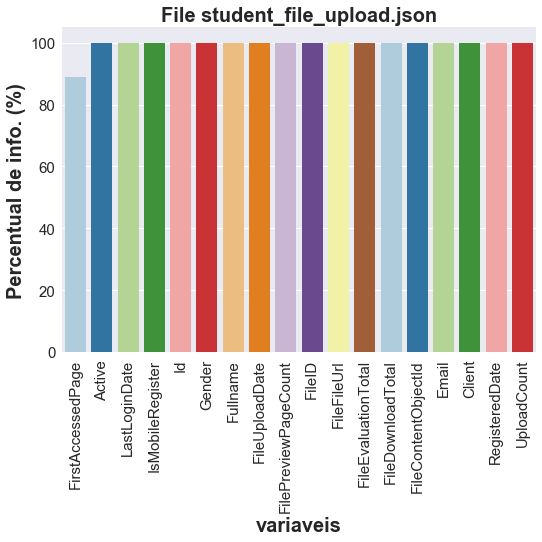

In [16]:
column_s_file_upload = []
total_s_file_upload = []

for column in df_student_file_upload.columns:
    perc = (float(df_student_file_upload[column].count())/
            len(df_student_file_upload))*100
    #print column, perc
    column_s_file_upload.append(column)
    total_s_file_upload.append(perc)

df_info_s_file_upload = pd.DataFrame(total_s_file_upload,
                              column_s_file_upload).reset_index()
df_info_s_file_upload.columns = ['variavel', '% de info']
df_info_s_file_upload = df_info_s_file_upload.sort_values(by='% de info', ascending=True)
print(df_info_s_file_upload)  #.iloc[:15,:]

graph_s_file_upload = sns.barplot(x='variavel', y='% de info',
                           data=df_info_s_file_upload, palette='Paired')
for tick in graph_s_file_upload.get_xticklabels():
    tick.set_rotation(90)

graph_s_file_upload.xaxis.set_tick_params(labelsize=15)    
graph_s_file_upload.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('variaveis', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File student_file_upload.json', fontweight='bold', fontsize=20)
plt.tight_layout()
graph_s_file_upload.figure.savefig('info_df_s_file_upload.png', dpi=1000)

# df_student_aggregate

In [17]:
with open("student_aggregate.json", "r") as f:
    data_student_aggregate = json.load(f)
    
df_student_aggregate = pd.DataFrame(data_student_aggregate) 

print('shape - df_student_aggregate', df_student_aggregate.shape)
df_student_aggregate.replace('', np.nan, inplace=True)

print(df_student_aggregate.info())

df_student_aggregate.head()

('shape - df_student_aggregate', (300, 19))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
Active               300 non-null object
CityId               300 non-null object
Client               300 non-null object
CourseMapId          300 non-null object
CourseName           300 non-null object
Email                300 non-null object
FirstAccessedPage    295 non-null object
Fullname             300 non-null object
Gender               300 non-null object
Id                   300 non-null object
IsMobileRegister     300 non-null object
LastLoginDate        300 non-null object
RegisteredDate       300 non-null object
StateId              300 non-null object
UniversityId         300 non-null object
UniversityName       300 non-null object
UploadCount          300 non-null object
cityName             300 non-null object
stateName            300 non-null object
dtypes: object(19)
memory usage: 44.6+ KB
None


,Active,CityId,Client,CourseMapId,CourseName,Email,FirstAccessedPage,Fullname,Gender,Id,IsMobileRegister,LastLoginDate,RegisteredDate,StateId,UniversityId,UniversityName,UploadCount,cityName,stateName
0,true,2116,Website,1199559,Engenharia Florestal e Silvicultura,7230c63235a4b813c10895ea81c5e837ed109b5dhotmai...,https://www.passeidireto.com/arquivo/5338385/n...,WilsonNeto Prointest,true,17765174,false,2015-12-07 16:47:36,2015-12-07 16:47:36,88,663764,Universidade Federal Rural do Semi-Árido,0,Mossoró,Rio Grande do Norte
1,true,2358,Website,1199555,Engenharia Elétrica,5e3b3e30997b4b75cba38374a92887dba58a7b42yahoo....,https://www.passeidireto.com/arquivo/4650148/2...,Lucas Lopes,true,17765145,false,2015-12-07 16:46:44,2015-12-07 16:46:43,98,663507,Universidade de Pernambuco,0,Recife,Pernambuco
2,true,1962,Website,1199766,Veterinária / Medicina Veterinária,7f52d09bc5724ed7c16c342fe48d361b2e21ce1fyahoo....,https://www.passeidireto.com/arquivo/1811565/c...,Rute Chamié A. Souza,false,17765111,false,2015-12-07 16:45:04,2015-12-07 16:45:05,83,663528,Universidade Federal Rural de Pernambuco,0,Belo Horizonte,Minas Gerais
3,true,1957,Website,1199517,Direito,e87e5c315076678b8d9807180186abb3b21b3563gmail.com,https://www.passeidireto.com/arquivo/2207246/a...,AnaRita Ablas,false,17765101,false,2015-12-07 16:44:43,2015-12-07 16:44:44,106,664264,Universidade Presbiteriana Mackenzie,0,São Paulo,São Paulo
4,true,1967,Website,1199766,Veterinária / Medicina Veterinária,48877a870798623213cfbd8281633e0f6114e0a0hotmai...,https://www.passeidireto.com/arquivo/2091296/t...,Renan Denadai,true,17765100,false,2015-12-07 16:44:35,2015-12-07 16:44:35,106,664284,Universidade Estadual Paulista Júlio de Mesqui...,0,Botucatu,São Paulo


             variavel   % de info
6   FirstAccessedPage   98.333333
0              Active  100.000000
16        UploadCount  100.000000
15     UniversityName  100.000000
14       UniversityId  100.000000
13            StateId  100.000000
12     RegisteredDate  100.000000
11      LastLoginDate  100.000000
10   IsMobileRegister  100.000000
9                  Id  100.000000
8              Gender  100.000000
7            Fullname  100.000000
5               Email  100.000000
4          CourseName  100.000000
3         CourseMapId  100.000000
2              Client  100.000000
1              CityId  100.000000
17           cityName  100.000000
18          stateName  100.000000


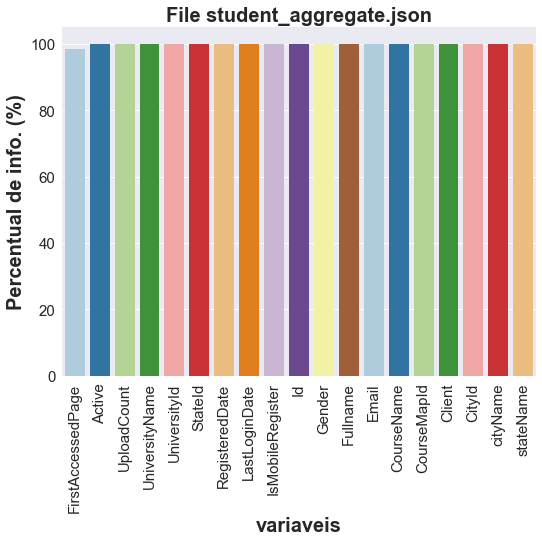

In [18]:
column_s_aggregate = []
total_s_aggregate = []

for column in df_student_aggregate.columns:
    perc = (float(df_student_aggregate[column].count())/
            len(df_student_aggregate))*100
    #print column, perc
    column_s_aggregate.append(column)
    total_s_aggregate.append(perc)

df_info_s_aggregate = pd.DataFrame(total_s_aggregate,
                              column_s_aggregate).reset_index()
df_info_s_aggregate.columns = ['variavel', '% de info']
df_info_s_aggregate = df_info_s_aggregate.sort_values(by='% de info', ascending=True)
print(df_info_s_aggregate)  #.iloc[:15,:]

graph_s_aggregate = sns.barplot(x='variavel', y='% de info',
                           data=df_info_s_aggregate, palette='Paired')
for tick in graph_s_aggregate.get_xticklabels():
    tick.set_rotation(90)

graph_s_aggregate.xaxis.set_tick_params(labelsize=15)    
graph_s_aggregate.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('variaveis', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File student_aggregate.json', fontweight='bold', fontsize=20)
plt.tight_layout()
graph_s_aggregate.figure.savefig('info_df_s_aggregate.png', dpi=1000)

# df_friend_connection

In [19]:
with open("friend_connection.json", "r") as f:
    data_friend_connection = json.load(f)
    
df_friend_connection = pd.DataFrame(data_friend_connection['friend_connection']) 
df_friend_connection.replace('', np.nan, inplace=True)

print('shape - df_friend_connection', df_friend_connection.shape)
print(df_friend_connection.info())
df_friend_connection.head()

('shape - df_friend_connection', (100000, 6))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
Client             0 non-null float64
FriendRequestId    100000 non-null object
FriendshipHash     100000 non-null object
Id                 100000 non-null object
Student1Id         100000 non-null object
Student2Id         100000 non-null object
dtypes: float64(1), object(5)
memory usage: 4.6+ MB
None


,Client,FriendRequestId,FriendshipHash,Id,Student1Id,Student2Id
0,NaN,29319610,f9957c00b31a8df6fdf4d0649e2a1851,40158628,16474100,16982798
1,NaN,29319610,f9957c00b31a8df6fdf4d0649e2a1851,40158627,16982798,16474100
2,NaN,811349,fab14c01cd70332200c096637928e3f7,40158624,831469,835427
3,NaN,811349,fab14c01cd70332200c096637928e3f7,40158622,835427,831469
4,NaN,811104,1fee0f91e1161979ba25cce0ff7d4eb1,40158621,831469,1097632


          variavel  % de info
0           Client        0.0
1  FriendRequestId      100.0
2   FriendshipHash      100.0
3               Id      100.0
4       Student1Id      100.0
5       Student2Id      100.0


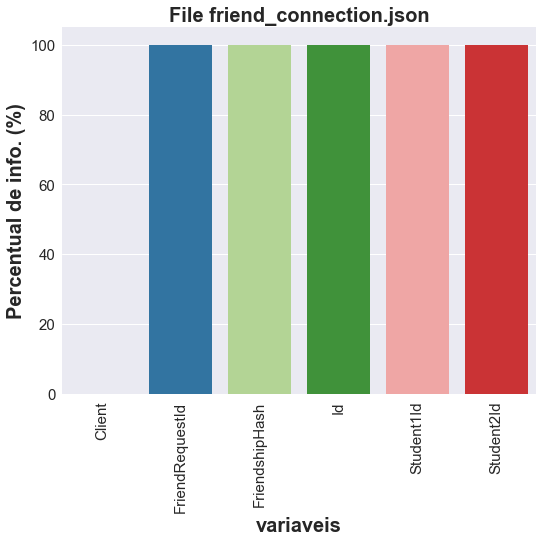

In [20]:
column_friend_connection = []
total_info_friend_connection = []

for column in df_friend_connection.columns:
    perc = (float(df_friend_connection[column].count())/
            len(df_friend_connection))*100
    #print column, perc
    column_friend_connection.append(column)
    total_info_friend_connection.append(perc)

df_info_f_conn = pd.DataFrame(total_info_friend_connection,
                              column_friend_connection).reset_index()
df_info_f_conn.columns = ['variavel', '% de info']
df_info_f_conn = df_info_f_conn.sort_values(by='% de info', ascending=True)
print(df_info_f_conn)  #.iloc[:15,:]

graph_f_conn = sns.barplot(x='variavel', y='% de info',
                           data=df_info_f_conn, palette='Paired')
for tick in graph_f_conn.get_xticklabels():
    tick.set_rotation(90)

graph_f_conn.xaxis.set_tick_params(labelsize=15)    
graph_f_conn.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('variaveis', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File friend_connection.json', fontweight='bold', fontsize=20)
plt.tight_layout()
#graph_f_conn.figure.savefig('info_df_f_conn.png', dpi=1000)


# df_friend_request

In [21]:
with open("friend_request.json", "r") as f:
    data_friend_request = json.load(f)
    
df_friend_request = pd.DataFrame(data_friend_request['friendrequest']) 
df_friend_request.replace('', np.nan, inplace=True)

print('shape - df_friend_request', df_friend_request.shape)
print(df_friend_request.info())
df_friend_request.head()

('shape - df_friend_request', (300000, 9))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
AcceptanceDate    59630 non-null object
Client            266861 non-null object
FriendshipHash    300000 non-null object
Id                300000 non-null object
Message           0 non-null float64
ReceiverId        300000 non-null object
RequestDate       300000 non-null object
SenderId          300000 non-null object
Status            300000 non-null object
dtypes: float64(1), object(8)
memory usage: 20.6+ MB
None


,AcceptanceDate,Client,FriendshipHash,Id,Message,ReceiverId,RequestDate,SenderId,Status
0,NaN,Website,aea4f6a172ab870e7a12b1cdfb0fae69,29320589,NaN,2072809,2015-12-07 19:32:46,6129347,P
1,NaN,Website,6989cabea5b68101188b6a759b089997,29320588,NaN,4102331,2015-12-07 19:32:41,6129347,P
2,NaN,Website,8437199e809d390387d220c23a5d5379,29320587,NaN,2145928,2015-12-07 19:32:40,6129347,P
3,NaN,Website,039d95f6f9b65c5eb18b277b8f953043,29320586,NaN,2531002,2015-12-07 19:32:36,6129347,P
4,NaN,Website,b2fc1821aecfd361ff85a3275167a76e,29320585,NaN,2167184,2015-12-07 19:32:13,6323293,P


         variavel   % de info
4         Message    0.000000
0  AcceptanceDate   19.876667
1          Client   88.953667
2  FriendshipHash  100.000000
3              Id  100.000000
5      ReceiverId  100.000000
6     RequestDate  100.000000
7        SenderId  100.000000
8          Status  100.000000


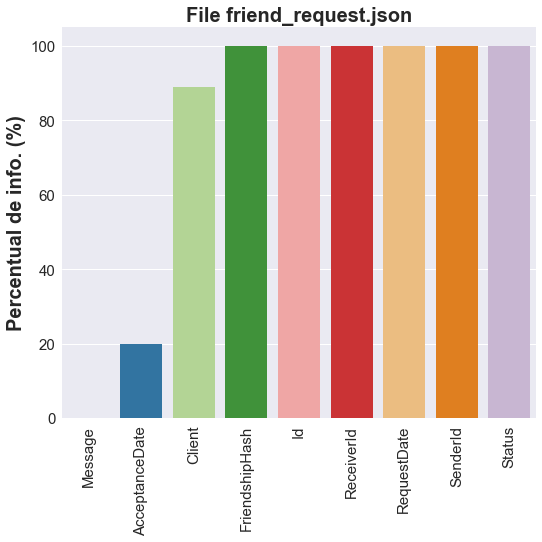

In [22]:
column_friend_req = []
total_info_friend_req = []

for column in df_friend_request.columns:
    perc = (float(df_friend_request[column].count())/
            len(df_friend_request))*100
    #print column, perc
    column_friend_req.append(column)
    total_info_friend_req.append(perc)

df_info_f_req = pd.DataFrame(total_info_friend_req,
                              column_friend_req).reset_index()
df_info_f_req.columns = ['variavel', '% de info']
df_info_f_req = df_info_f_req.sort_values(by='% de info', ascending=True)
print(df_info_f_req)  #.iloc[:15,:]

graph_f_req = sns.barplot(x='variavel', y='% de info',
                           data=df_info_f_req, palette='Paired')
for tick in graph_f_req.get_xticklabels():
    tick.set_rotation(90)

graph_f_req.xaxis.set_tick_params(labelsize=15)    
graph_f_req.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File friend_request.json', fontweight='bold', fontsize=20)
plt.tight_layout()
#graph_f_req.figure.savefig('info_df_f_req.png', dpi=1000)

# df_loginlog

In [23]:
with open("student_loginlog_aggreagate.json", "r") as f:
    data_loginlog = json.load(f)
    
df_loginlog = pd.DataFrame(data_loginlog['student_loginlog_aggreagate']) 
df_loginlog.replace('', np.nan, inplace=True)

print('shape - df_loginlog', df_loginlog.shape)
print(df_loginlog.info())
df_loginlog.head()

('shape - df_loginlog', (300, 15))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
Active               300 non-null object
Client               300 non-null object
ClientLogin          73 non-null object
Email                300 non-null object
FirstAccessedPage    233 non-null object
Fullname             300 non-null object
Gender               300 non-null object
IP                   73 non-null object
Id                   300 non-null object
IsMobileLogin        300 non-null object
IsMobileRegister     300 non-null object
LastLoginDate        300 non-null object
LoginDate            300 non-null object
RegisteredDate       300 non-null object
UploadCount          300 non-null object
dtypes: object(15)
memory usage: 35.2+ KB
None


,Active,Client,ClientLogin,Email,FirstAccessedPage,Fullname,Gender,IP,Id,IsMobileLogin,IsMobileRegister,LastLoginDate,LoginDate,RegisteredDate,UploadCount
0,true,Website,NaN,daiane-juan@hotmail.com,https://www.passeidireto.com/arquivo/16619832/...,DaianeeJuan Avelar,false,NaN,17769092,false,false,2015-12-07 18:24:35,2015-12-07 18:24:35,2015-12-07 18:24:35,0
1,true,Website,NaN,gabrielle_barreira@hotmail.com,https://www.passeidireto.com/arquivo/5035174/c...,GabrielleBarreira Goes,false,NaN,17769091,false,false,2015-12-07 18:24:24,2015-12-07 18:24:24,2015-12-07 18:24:21,0
2,true,Website,NaN,essentialpersonforlife@gmail.com,https://www.passeidireto.com/arquivo/3076452/s...,Sergen Hüseyin Özkan,true,NaN,17769082,false,false,2015-12-07 18:24:12,2015-12-07 18:24:12,2015-12-07 18:24:12,0
3,true,Website,NaN,glacielematos@yahoo.com.br,https://www.passeidireto.com/arquivo/3055763/c...,Grazi Leandro,false,NaN,17769073,false,false,2015-12-07 18:24:02,2015-12-07 18:24:02,2015-12-07 18:24:01,0
4,true,Website,NaN,havilo_weider@hotmail.com,https://www.passeidireto.com/arquivo/2372371/a...,haviloweideraraujo lopes,false,NaN,17769065,false,false,2015-12-07 18:23:49,2015-12-07 18:23:49,2015-12-07 18:23:49,0


             variavel   % de info
2         ClientLogin   24.333333
7                  IP   24.333333
4   FirstAccessedPage   77.666667
0              Active  100.000000
1              Client  100.000000
3               Email  100.000000
5            Fullname  100.000000
6              Gender  100.000000
8                  Id  100.000000
9       IsMobileLogin  100.000000
10   IsMobileRegister  100.000000
11      LastLoginDate  100.000000
12          LoginDate  100.000000
13     RegisteredDate  100.000000
14        UploadCount  100.000000


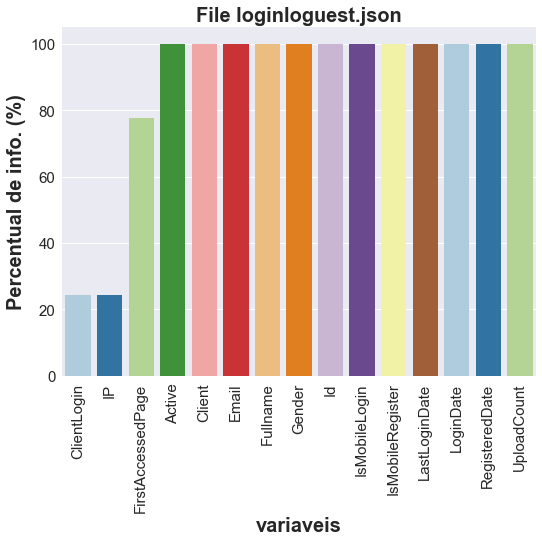

In [24]:
column_loginlog = []
total_info_loginlog = []

for column in df_loginlog.columns:
    perc = (float(df_loginlog[column].count())/
            len(df_loginlog))*100
    #print column, perc
    column_loginlog.append(column)
    total_info_loginlog.append(perc)

df_info_f_loginlog = pd.DataFrame(total_info_loginlog,
                              column_loginlog).reset_index()
df_info_f_loginlog.columns = ['variavel', '% de info']
df_info_f_loginlog = df_info_f_loginlog.sort_values(by='% de info', ascending=True)
print(df_info_f_loginlog)  #.iloc[:15,:]

graph_f_loginlog = sns.barplot(x='variavel', y='% de info',
                           data=df_info_f_loginlog, palette='Paired')
for tick in graph_f_loginlog.get_xticklabels():
    tick.set_rotation(90)

graph_f_loginlog.xaxis.set_tick_params(labelsize=15)    
graph_f_loginlog.yaxis.set_tick_params(labelsize=15)    

plt.xlabel('variaveis', fontweight='bold', fontsize=20)
plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
plt.title('File loginloguest.json', fontweight='bold', fontsize=20)
plt.tight_layout()
#graph_f_req.figure.savefig('info_df_f_req.png', dpi=1000)